# Modeling Heart Disease

In [455]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [456]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [457]:
import numpy as np

In [458]:
import eli5
from eli5.sklearn import PermutationImportance

In [459]:
heart = pd.read_csv('heart.csv')

In [460]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})

**Scale features**

In [461]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'blood_pressure', 'cholesterol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

/Users/melaniewalsh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/melaniewalsh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**One-hot encode categorical features**

In [462]:
heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

**Separate features from target labels (healthy or sick)**

In [463]:
labels = heart['target']
features = heart.drop(['target'], axis = 1)

**Split features and target labels into a training set and a test set** 

In [464]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.3, random_state=1)

# Random Forest

**Find the optimal number of decision trees for the Random Forest model (from a list of options)** 

[0.7692307692307693, 0.8241758241758241, 0.8241758241758241, 0.8351648351648352, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8351648351648352]


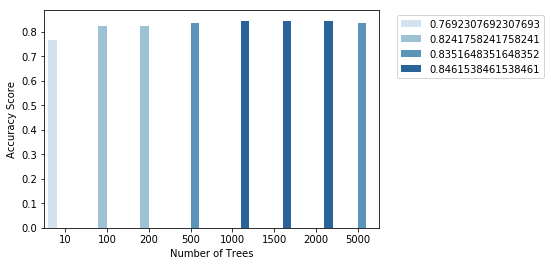

In [421]:
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    randomForest = RandomForestClassifier(n_estimators = x, random_state = 1, max_depth=1)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(trees, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**Find the optimal max_depth for the Random Forest model (from a list of options)** 

[0.8461538461538461, 0.8021978021978022, 0.7582417582417582, 0.7692307692307693]


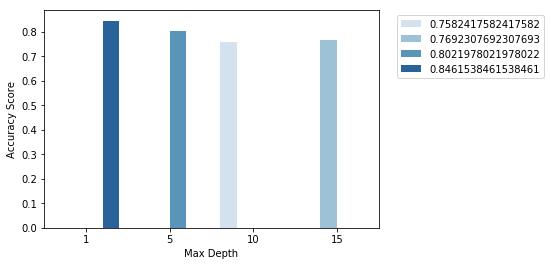

In [420]:
randomForest_scores = []
depth = [1, 5, 10, 15]
for x in depth:
    randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth= x)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(depth, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**Instantiate model with 1000 decision trees and max depth of 1 (optimal numbers based on iterated experiments above)**

In [432]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)

**Train the model on features and labels training data**

In [433]:
randomForest.fit(features_train, labels_train);

**Test the model on features and labels test data to assess its accuracy**

In [434]:
randomForest.score(features_test, labels_test)

score = round(randomForest.score(features_test,labels_test), 3) *100

print(f"Random Forest accuracy is {score}%")

Random Forest accuracy is 84.6%


**Feature ranking**

In [409]:
perm = PermutationImportance(randomForest, random_state=1).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0374 ± 0.0357,thal_2
0.0242 ± 0.0426,vessels
0.0220 ± 0.0241,thal_3
0.0154 ± 0.0108,chest_pain_2
0.0132 ± 0.0378,exang_1
0.0066 ± 0.0176,slope_1
0 ± 0.0000,blood_pressure
0.0000 ± 0.0139,sex_1
0 ± 0.0000,chest_pain_3
0 ± 0.0000,blood_sugar_1


**Confusion matrix**

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

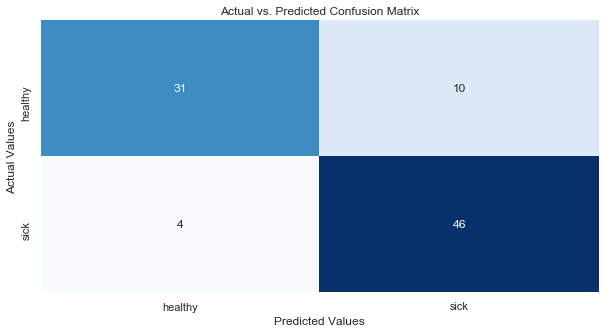

In [454]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

# K Nearest Neighbors

In [465]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 78.0%


**Find the optimal k value (from 1-20)**

Max K Nearest Neighbors Accuracy is 84.62%
Best K is 17


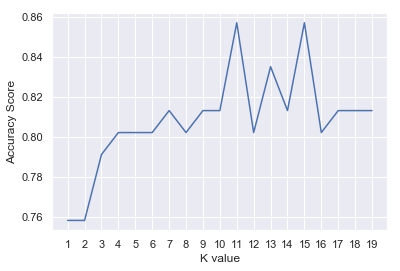

In [466]:
accuracyScores = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))
    
    
sns.lineplot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2) 

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

# Logistic Regression

In [436]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 80.2%


# Naive Bayes

In [437]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(features_train, labels_train)
nb.score(features_test,labels_test)

score = round(nb.score(features_test,labels_test), 3) *100

print(f"Naive Bayes accuracy is {score}%")

Naive Bayes accuracy is 80.2%
